In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset doesn't have column names
dataset = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']

# Load the dataset
df = pd.read_csv('airfoil_self_noise.dat', delimiter='\t', header=None, names=column_names)


# Print 2 rows for sanity check
print(df.head(2))

   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   

   Suction_side_displacement_thickness  Scaled_sound_pressure_level  
0                             0.002663                      126.201  
1                             0.002663                      125.201  


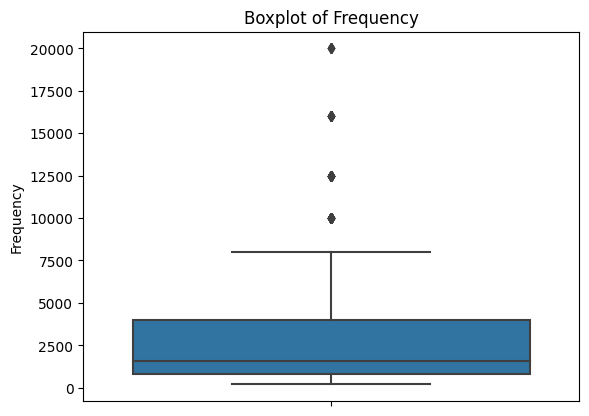

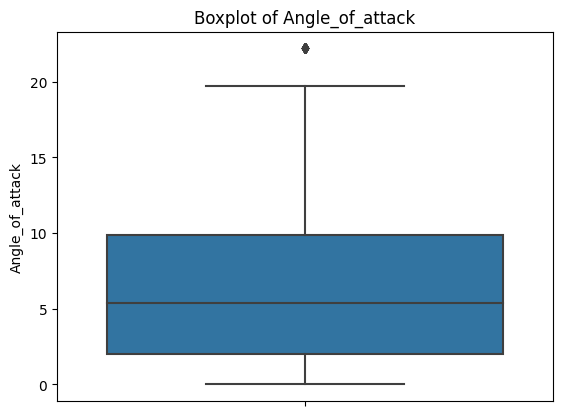

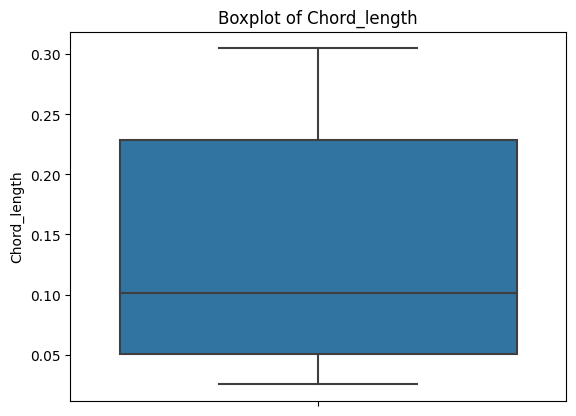

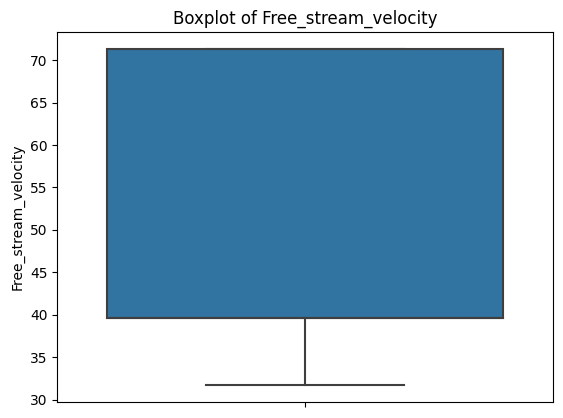

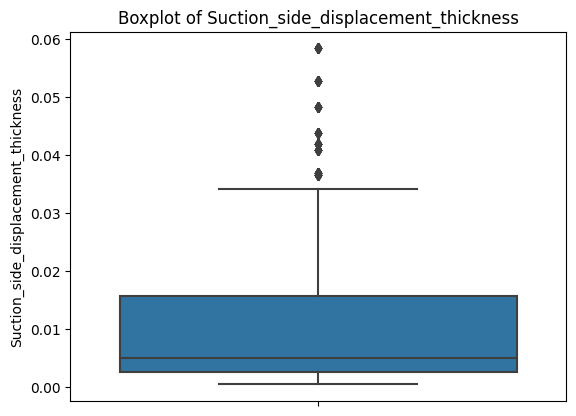

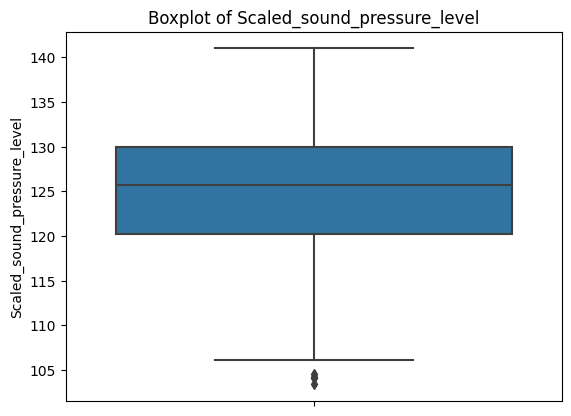

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None, names=['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level'])

# Select the numerical features for visualization
numerical_features = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']

# Create boxplots for each numerical feature
for feature in numerical_features:
    plt.figure()
    sns.boxplot(data=data, y=feature)
    plt.title(f"Boxplot of {feature}")
    plt.show()


##SUMMARY##
#Central tendency: The  mean frequency is 2886.38, the mean angle of attack is 6.78, and the mean scaled sound pressure level is 124.84. These values provide a measure of the central tendency around which the data points tend to cluster.
#Spread or variability: The standard deviation for frequency is 3152.57, angle of attack is 5.92, and scaled sound pressure level is 6.90. These values help in understanding how much the data points deviate from the mean and how dispersed the values are.
#Range: The frequency ranges from a minimum of 200 to a maximum of 20000, angle of attack ranges from 0 to 22.2, and scaled sound pressure level ranges from 103.38 to 140.99. These values give an overview of the entire range of values covered by the dataset.
#Quartiles: The 25th percentile for frequency is 800, the median (50th percentile) is 1600, and the 75th percentile is 4000. These quartiles help in understanding the distribution of the data and identifying any skewness or outliers.

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None, names=['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level'])

# Select the numerical features
numerical_features = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']

# Define the threshold for outlier detection (you can adjust this based on your requirements)
outlier_threshold = 1.5

# Find outliers for each numerical feature
for feature in numerical_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    num_outliers = len(outliers)

    print(f"Outliers for {feature}:")
    if num_outliers == 0:
        print("No outliers found.")
    else:
        print(outliers)
    print()

##SUMMARY##
#Frequency:
#There are 86 outliers in the 'Frequency' column.
#The outliers range from 10,000 to 16,000.
#Other variables in these outlier rows: Angle_of_attack, Chord_length, Free_stream_velocity, Suction_side_displacement_thickness, Scaled_sound_pressure_level.
#Angle_of_attack:
#There are 30 outliers in the 'Angle_of_attack' column.
#The outliers have a value of 22.2.
#Other variables in these outlier rows: Frequency, Chord_length, Free_stream_velocity, Suction_side_displacement_thickness, Scaled_sound_pressure_level.
#Chord_length and Free_stream_velocity no outlier.
#Suction_side_displacement_thickness:
#There are 124 outliers in the 'Suction_side_displacement_thickness' column.
#The outliers have various values.
#Other variables in these outlier rows: Frequency, Angle_of_attack, Chord_length, Free_stream_velocity, Scaled_sound_pressure_level.
#Scaled_sound_pressure_level:
#There are 4 outliers in the 'Scaled_sound_pressure_level' column.
#The outliers have values ranging from 103.38 to 104.5.
#Other variables in these outlier rows: Frequency, Angle_of_attack, Chord_length, Free_stream_velocity, Suction_side_displacement_thickness.



Outliers for Frequency:
      Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
11        10000              0.0        0.3048                  71.3   
12        12500              0.0        0.3048                  71.3   
13        16000              0.0        0.3048                  71.3   
27        10000              0.0        0.3048                  55.5   
28        12500              0.0        0.3048                  55.5   
...         ...              ...           ...                   ...   
1280      10000              0.0        0.1016                  39.6   
1293      10000              0.0        0.1016                  31.7   
1305      10000              3.3        0.1016                  71.3   
1318      10000              3.3        0.1016                  55.5   
1331      10000              3.3        0.1016                  39.6   

      Suction_side_displacement_thickness  Scaled_sound_pressure_level  
11                               0.002

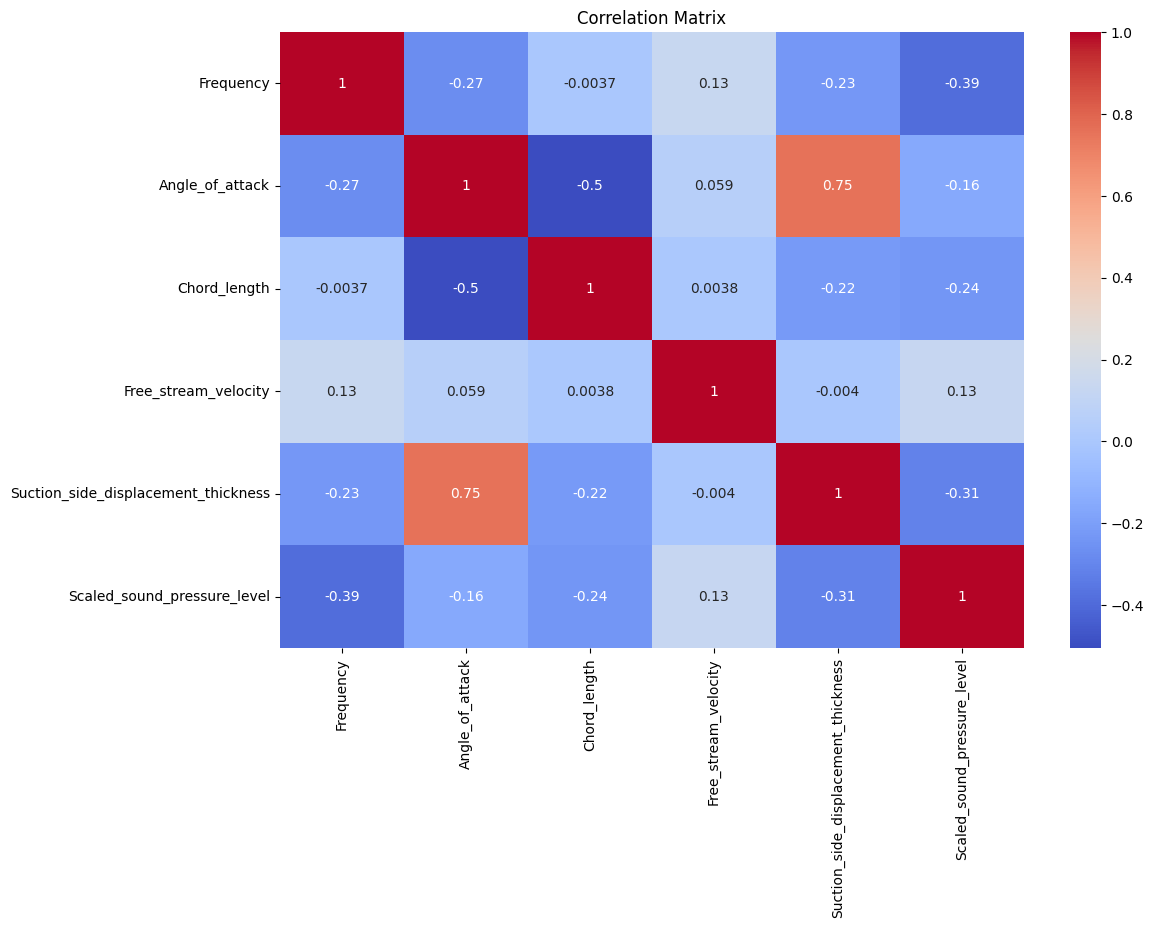

In [7]:
# correlation coefficients btw numerical features with heapmap
# Compute the correlation between each feature and the target variable ("Scaled_sound_pressure_level"). 
# Features with higher absolute correlation values are considered more important for predicting the target variable.
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Summary
#The Scaled_sound_pressure_level (target variable) has moderate negative correlations with some of the features like Frequency (-0.39) and Angle_of_attack (-0.16).
#The Chord_length and Suction_side_displacement_thickness features have weak negative correlations with the target variable.
#The other features (Angle_of_attack, Free_stream_velocity) show weak positive correlations or very low correlations with the target variable.
#Frequency and Angle_of_attack might have a significant impact on predicting the Scaled_sound_pressure_level. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None, names=['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level'])

# Based on correlation analysis, assign the feature data (X) and target variable (y)
x = data[['Frequency', 'Angle_of_attack']]
y = data['Scaled_sound_pressure_level']

# Reshape y to match the expected shape
y = y.values.reshape(-1, 1)

# Split the dataset into training and test sets based on Case 1: Train = 80%, Test = 20%.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape y_train and y_test using ravel()
y_train = y_train.ravel()
y_test = y_test.ravel()

# Perform k-fold cross-validation on the training set
k = 5  # Number of folds

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Store the validation scores for each model
validation_scores = {}

# Iterate over the models
for model_name, model in models.items():
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, x_train, y_train, cv=k, error_score='raise')
    validation_scores[model_name] = cv_scores

    # Select the best model based on the mean cross-validation score
    best_model_idx = np.argmax(cv_scores)
    best_model = model

    # Fit the best model on the entire training set
    best_model.fit(x_train, y_train)

    # Evaluate the model on the test set
    test_score = best_model.score(x_test, y_test)

    print(f"Model: {model_name}")
    print("Cross-validation scores:", cv_scores)
    print("Best model:", best_model)
    print("Test score:", test_score)
    print()

# Print the validation scores for each model
for model_name, scores in validation_scores.items():
    print(f"Model: {model_name}")
    print("Validation scores:", scores)
    print("Mean validation score:", np.mean(scores))
    print()

# Print the summary as values
print("Validation Scores Summary:")
for model_name, scores in validation_scores.items():
    print(f"{model_name}: {', '.join(map(str, scores))}")
print()

# Best model summary:
# Based on the validation scores, the Random Forest model is recommended as the best model for predicting the scaled sound pressure level based on the given dataset and correlation analysis.


Model: Linear Regression
Cross-validation scores: [0.22039781 0.28104854 0.29100314 0.1277139  0.18615716]
Best model: LinearRegression()
Test score: 0.2015507531339933

Model: K-Nearest Neighbors
Cross-validation scores: [0.23931627 0.24245133 0.3462626  0.27380871 0.26749098]
Best model: KNeighborsRegressor()
Test score: 0.2992628184085645

Model: Decision Tree
Cross-validation scores: [0.52471011 0.48948022 0.5925425  0.49820607 0.58499927]
Best model: DecisionTreeRegressor()
Test score: 0.5765901822766188

Model: Random Forest
Cross-validation scores: [0.61889884 0.58454792 0.6543528  0.5891905  0.63579366]
Best model: RandomForestRegressor()
Test score: 0.6234515319625802

Model: Linear Regression
Validation scores: [0.22039781 0.28104854 0.29100314 0.1277139  0.18615716]
Mean validation score: 0.2212641112886254

Model: K-Nearest Neighbors
Validation scores: [0.23931627 0.24245133 0.3462626  0.27380871 0.26749098]
Mean validation score: 0.27386598085142205

Model: Decision Tree
V

In [ ]:
#Summary:

#The dataset was split into a training set (80%) and a test set (20%) because dataset is sufficient for training.

#Four regression models were evaluated: Linear Regression, K-Nearest Neighbors, Decision Tree, and Random Forest.

#Cross-validation was performed on the training set using 5-fold cross-validation.

#The validation scores for each model are as follows:

#Linear Regression: 0.220, 0.281, 0.291, 0.128, 0.186
#K-Nearest Neighbors: 0.239, 0.242, 0.346, 0.274, 0.267
#Decision Tree: 0.525, 0.489, 0.593, 0.498, 0.585
#Random Forest: 0.619, 0.585, 0.654, 0.589, 0.636
#The Random Forest model consistently achieved the highest validation scores among the four models.

#Based on the validation scores, the Random Forest model is recommended as the best model for predicting the scaled sound pressure level in this dataset.